In [1]:
%run ../../notebooks/__init__.ipynb

prody not found; if needed, install with: conda install conda-forge::prody


In [2]:
df_esm = pd.read_csv('af2.esm_score_missense_mutations.csv', sep=',', nrows=None).rename({'seq_id': 'uniprot_id', 'esm_score': 'esm_pathogenicity_score'}, axis=1)
df_esm.insert(loc=0, column='variant_id', value=[*map(lambda uniprot_id, mut_name: f'{uniprot_id}/{mut_name}', df_esm['uniprot_id'], df_esm['mut_name'])])
df_esm['esm_pathogenicity_label'] = df_esm['esm_pathogenicity_score'].map(lambda score: 'pathogenic' if score < -7.5 else 'benign')
cols_ = ['variant_id', 'esm_pathogenicity_score', 'esm_pathogenicity_label']
df_esm = df_esm[cols_].set_index('variant_id', drop=True)
df_esm

,esm_pathogenicity_score,esm_pathogenicity_label
variant_id,,
A0A023PYF4/M1K,-8.933971,pathogenic
A0A023PYF4/M1R,-8.939993,pathogenic
A0A023PYF4/M1H,-9.798146,pathogenic
A0A023PYF4/M1E,-9.783135,pathogenic
A0A023PYF4/M1D,-9.982563,pathogenic
...,...,...
Q9ZZX9/S128M,-4.757793,benign
Q9ZZX9/S128P,-3.268743,benign
Q9ZZX9/S128Y,-3.532931,benign


In [3]:
df_pssm = pd.read_csv('af2.trim_bf.repairpdb.pssm.tsv.gz', sep='\t', index_col='variant_id', nrows=None)
df_pssm.columns = df_pssm.columns.map(lambda s: f'foldx_{s}'.replace(' ', '_'))
df_pssm

,foldx_total_energy,foldx_Backbone_Hbond,foldx_Sidechain_Hbond,foldx_Van_der_Waals,foldx_Electrostatics,foldx_Solvation_Polar,foldx_Solvation_Hydrophobic,foldx_Van_der_Waals_clashes,foldx_entropy_sidechain,foldx_entropy_mainchain,foldx_cis_bond,foldx_torsional_clash,foldx_backbone_clash,foldx_helix_dipole,foldx_disulfide,foldx_energy_Ionisation
variant_id,,,,,,,,,,,,,,,,
P31688/R13A,1.079610,1.84439,1.40530,1.849950,0.347089,-3.106470,1.433230,-7.302750e-03,-1.946900,-0.754708,0.0,-1.985080e-02,-0.251124,0.034871,0.0,0.000000e+00
P31688/R13C,1.504660,1.66476,1.65176,1.561450,0.470368,-2.819260,1.158290,-1.791460e-03,-1.650040,-0.546371,0.0,-1.750860e-02,-0.153265,0.033011,0.0,-1.776360e-15
P31688/R13D,1.864650,1.68617,1.65176,1.723350,0.770899,-2.903490,1.326490,-7.730210e-03,-1.858510,-0.548361,0.0,-1.764570e-02,-0.177927,0.041717,0.0,-2.664540e-15
P31688/R13E,1.559970,1.78584,1.39831,1.399810,0.601000,-2.370210,0.939066,-5.089890e-03,-1.646900,-0.561810,0.0,-1.837270e-02,-0.127188,0.038325,0.0,-8.881780e-16
P31688/R13F,0.990531,1.74064,1.41902,0.988357,0.453385,-1.885150,0.421027,5.755110e-03,-1.569650,-0.623004,0.0,9.977990e-03,0.050561,0.030168,0.0,-2.664540e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q45U18/Y67S,0.282357,0.00000,0.00000,0.215280,0.007622,-0.076505,0.399265,0.000000e+00,-0.037849,-0.225456,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00
Q45U18/Y67T,0.152663,0.00000,0.00000,0.243062,0.007622,-0.211840,0.367165,0.000000e+00,-0.037849,-0.215496,0.0,-1.110220e-16,0.000000,0.000000,0.0,0.000000e+00
Q45U18/Y67V,0.180510,0.00000,0.00000,0.199468,0.007622,-0.150159,0.313742,0.000000e+00,-0.037849,-0.152314,0.0,-3.330670e-16,0.000000,0.000000,0.0,0.000000e+00


In [4]:
df_missense = df_esm.join([df_pssm], how='left')
phead(df_missense)

57,984,640 records


variant_id,A0A023PYF4/M1K,A0A023PYF4/M1R,A0A023PYF4/M1H
esm_pathogenicity_score,-8.933971,-8.939993,-9.798146
esm_pathogenicity_label,pathogenic,pathogenic,pathogenic
foldx_total_energy,NaN,NaN,NaN
foldx_Backbone_Hbond,NaN,NaN,NaN
foldx_Sidechain_Hbond,NaN,NaN,NaN
foldx_Van_der_Waals,NaN,NaN,NaN
foldx_Electrostatics,NaN,NaN,NaN
foldx_Solvation_Polar,NaN,NaN,NaN
foldx_Solvation_Hydrophobic,NaN,NaN,NaN
foldx_Van_der_Waals_clashes,NaN,NaN,NaN


In [5]:
printlenq(df_missense, 'esm_pathogenicity_score == esm_pathogenicity_score', 'variants with a pathogenicity score')
printlenq(df_missense, 'foldx_total_energy == foldx_total_energy', 'variants with a foldx score')

57,984,640 of 57,984,640 (100.00%) variants with a pathogenicity score


45,897,860 of 57,984,640 (79.16%) variants with a foldx score


In [6]:
def f_(foldx_total_energy):
    if foldx_total_energy > 2:
        return 'destabilizing'
    elif foldx_total_energy == foldx_total_energy:
        return 'not_destabilizing'
    else:
        return 'no_call'

df_missense['foldx_label'] = df_missense['foldx_total_energy'].map(f_)
df_missense['foldx_label'].value_counts()

foldx_label
not_destabilizing    31494346
destabilizing        14403514
no_call              12086780
Name: count, dtype: int64

<Axes: xlabel='esm_pathogenicity_label', ylabel='foldx_total_energy'>

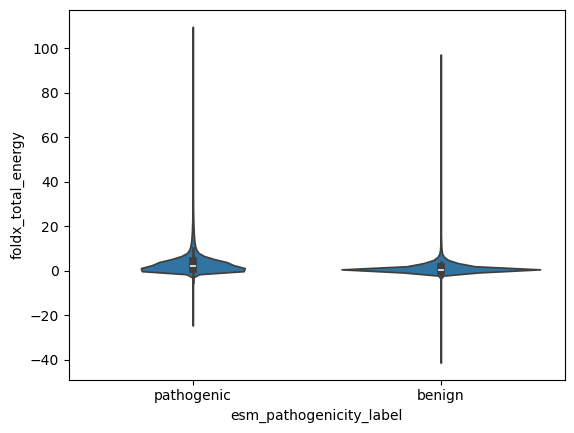

In [7]:
#sns.kdeplot(data=df_missense, x='esm_pathogenicity_score', y='foldx_total_energy')
sns.violinplot(df_missense, x='esm_pathogenicity_label', y='foldx_total_energy')

In [8]:
fp_ = 'yeast_missense.tsv.gz'
df_missense.to_csv(fp_, sep='\t', index=True, header=True)
!md5sum {fp_}

c6a3aee60cbe3678a3310436b88da254  yeast_missense.tsv.gz


In [9]:
fp_ = 'yeast_missense.sqlite'
with sqlite3.connect(fp_) as con:
    df_missense.to_sql('missense', con, index=True, index_label='variant_id', if_exists='replace')
!md5sum {fp_}

c306192fd1bca9cab305a368415033a9  yeast_missense.sqlite
